In [21]:
import numpy as npc
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score,f1_score 

In [22]:
import pandas as pd  # Importa a biblioteca pandas

# Lê o arquivo CSV e carrega em um DataFrame
df = pd.read_csv("../Somativa/dados_produtos.csv")

# Exibe as primeiras 5 linhas do DataFrame
df.head()


,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


<Axes: xlabel='product_name', ylabel='rating'>

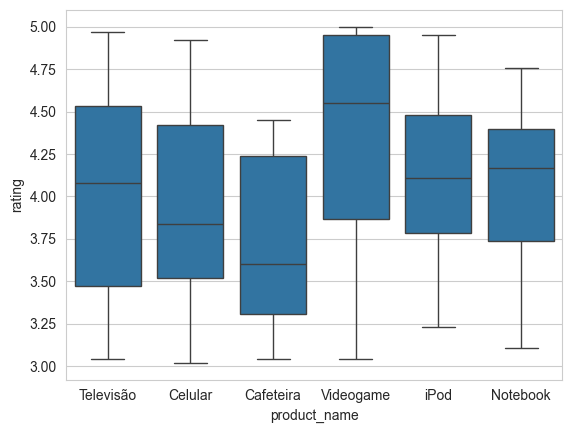

In [23]:
# Define o estilo do gráfico como 'whitegrid'
sns.set_style("whitegrid")

# Cria um boxplot comparando a coluna 'product_name' (nomes dos produtos) com a coluna 'rating' (avaliações)
sns.boxplot(x=df['product_name'], y=df['rating'])


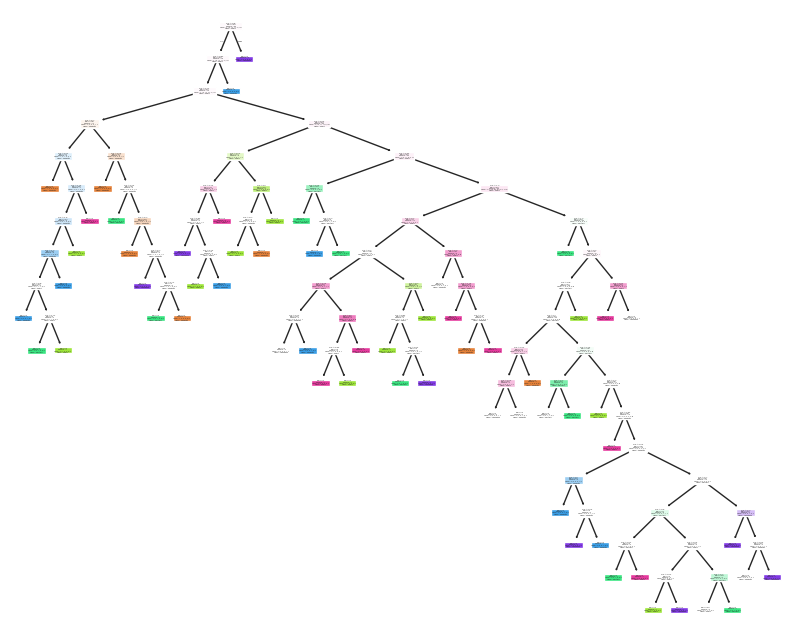

In [24]:

# Converte as colunas 'rating' e 'product_name' em arrays NumPy
x = np.array(df['rating'])
y = np.array(df['product_name'])

# Define os nomes das colunas (não utilizado diretamente no código, mas poderia ser para rotular ou mapear)
names_colunas = ["Televisão", "Celular", "Cafeteira", "Videogame", 'IPod', "Notebook"]

# Divide os dados em conjuntos de treino (80%) e teste (20%)
X_train, X_test, Y_train, Y_test = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=42)

# Cria e treina o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Faz previsões no conjunto de teste
prev = model.predict(X_test)

# Calcula a acurácia do modelo
acurracy = accuracy_score(Y_test, prev)

# Gera a matriz de confusão para avaliar o desempenho do modelo
matrix = confusion_matrix(Y_test, prev)

# Plota a árvore de decisão
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.tolist(), class_names=y.tolist(), filled=True)
plt.show()


Arvore de decisão  Televisão


C:\Users\47341687843\AppData\Local\Temp\ipykernel_4212\1570133559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


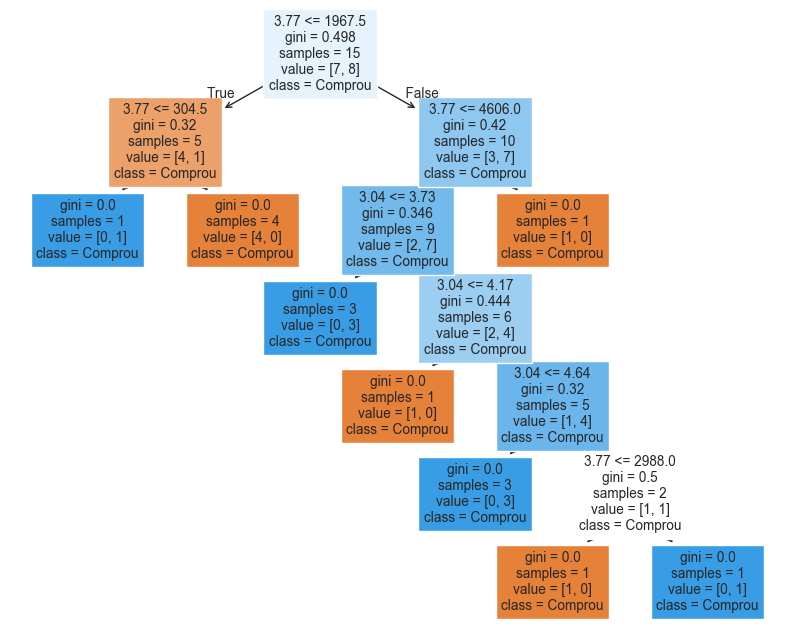

Arvore de decisão  Celular


C:\Users\47341687843\AppData\Local\Temp\ipykernel_4212\1570133559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


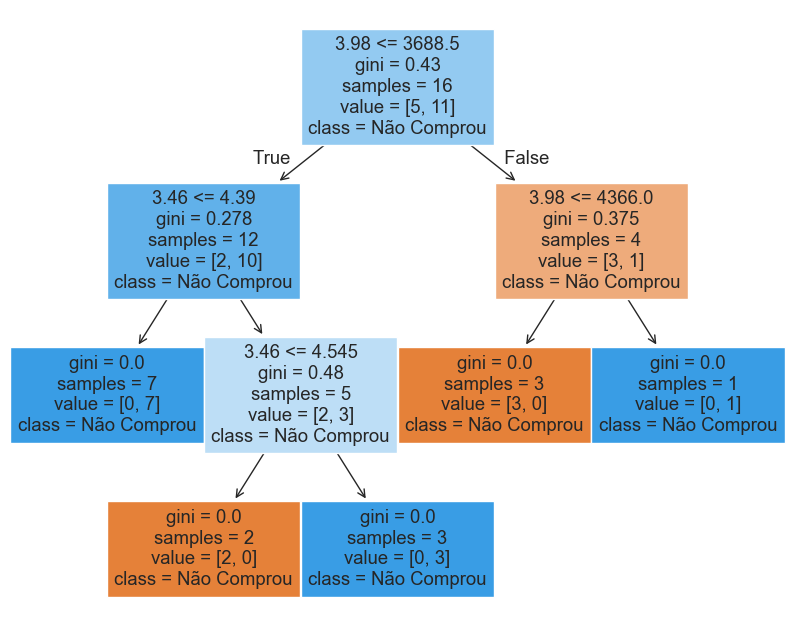

Arvore de decisão  Cafeteira


C:\Users\47341687843\AppData\Local\Temp\ipykernel_4212\1570133559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


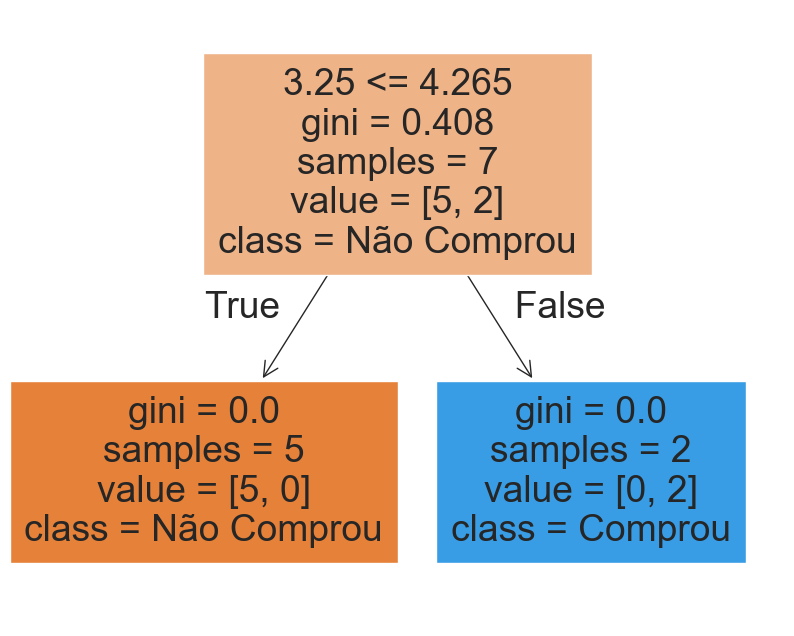

Arvore de decisão  Videogame


C:\Users\47341687843\AppData\Local\Temp\ipykernel_4212\1570133559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


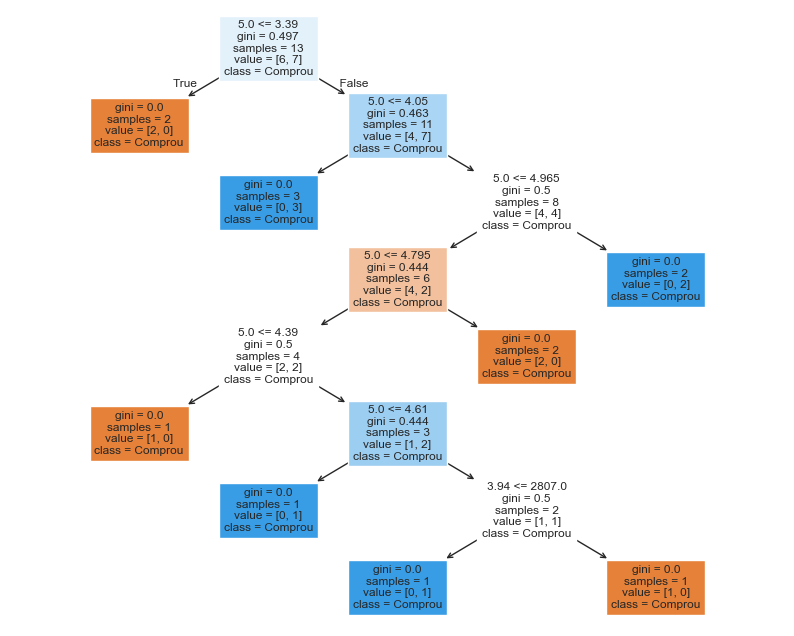

Arvore de decisão  iPod


C:\Users\47341687843\AppData\Local\Temp\ipykernel_4212\1570133559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


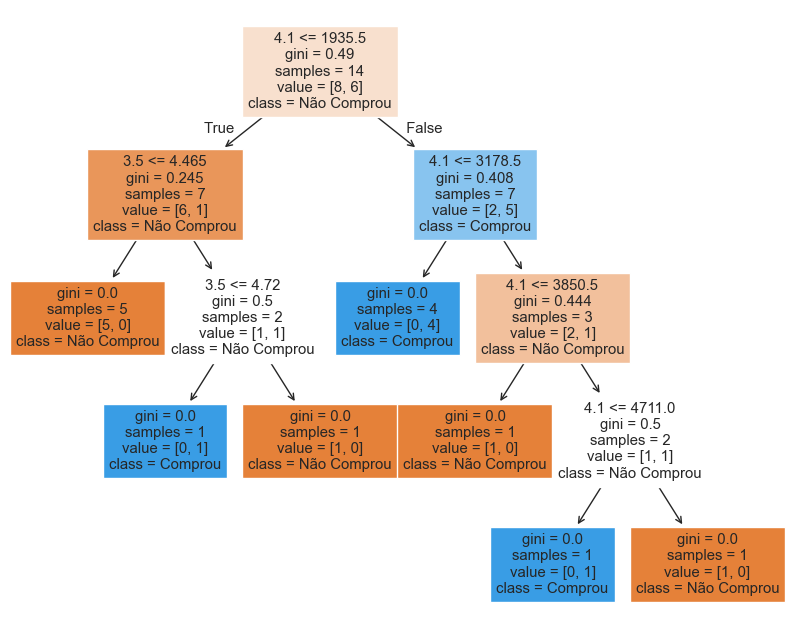

Arvore de decisão  Notebook


C:\Users\47341687843\AppData\Local\Temp\ipykernel_4212\1570133559.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])


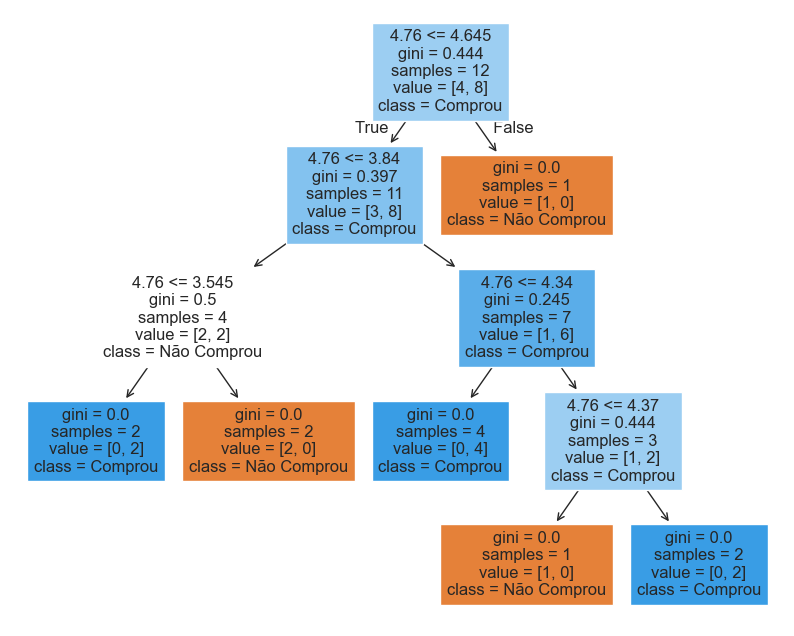

In [25]:

# Inicializa listas para armazenar valores relacionados a televisores
rating_televi_value = []
purchased_televi_value = []

# Obtém os produtos únicos do DataFrame
produtos = df['product_name'].unique()

# Para cada produto único, será criada uma árvore de decisão separada
for produto in produtos:
    print('Arvore de decisão', produto)

    # Filtra os dados para o produto atual
    produto_df = df.loc[df['product_name'] == produto]

    # Define X como todas as colunas exceto 'purchased' e 'product_name'
    X = produto_df.drop(['purchased', 'product_name'], axis=1)
    
    # Define y como a coluna 'purchased' (target)
    y = produto_df['purchased']
    
    # Divide os dados em treino (80%) e teste (20%)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Substitui os valores 1 e 0 na coluna 'purchased' para 'Comprou' e 'Não Comprou'
    produto_df['purchased'] = produto_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])

    # Cria e treina o modelo de árvore de decisão
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    # Faz previsões no conjunto de teste
    prev = model.predict(X_test)

    # Plota a árvore de decisão
    fig = plt.figure(figsize=(10, 8))
    tree.plot_tree(
        model, 
        feature_names=produto_df.drop(['purchased', 'product_name'], axis=1).columns.tolist(),  # Utiliza os nomes das features
        class_names=['Não Comprou', 'Comprou'],  # Classifica as categorias de saída
        filled=True
    )
    plt.show()
